In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import contractions
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix
import ast
from nltk.corpus import wordnet
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from collections import Counter
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.decomposition import PCA

In [4]:
import re
#define the process of text cleaning
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r' ',text)
#Clean Text
def clean_text(data):
    # convert catacter to lowercase
    data['clean_text']=data['yy'].str.lower()
    #remove URLS
    data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r"http\S+", "", elem))
    #remove ponctuation
    data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r"[^\w\s]", "", elem))
    #remove
    data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'/n',"",elem))
    #remove degits
    data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'\d+',"",elem))
    #remove emojis
    data['clean_text'] = data['clean_text'].apply(lambda elem:deEmojify(elem))
    #remove multiple spaces
    data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'\s+'," ",elem))
    #remove single caracter
    data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'\s+[a-zA-Z]\s+'," ",elem))
    return data

def get_part_of_speech_tags(token):
    tag_dict = {"J":wordnet.ADJ,
                "N":wordnet.NOUN,
                "V":wordnet.VERB,
                "R":wordnet.ADV}
    tag = nltk.pos_tag([token])[0][1][0].upper()
    return tag_dict.get(tag, wordnet.NOUN)

def process_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Handle contractions using the contractions library
    expanded_text = contractions.fix(text)

    # Lowercasing
    expanded_text = expanded_text.lower()

    # Tokenization
    tokens = word_tokenize(expanded_text)

    # Removing Punctuation
    tokens = [word for word in tokens if word.isalnum()]

    # Removing Stop Words
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(word,get_part_of_speech_tags(word)) for word in tokens]

    return ' '.join(tokens)

In [20]:
df = pd.read_csv('post-ontology-label.csv')
df

,post,prefLabel,compulsion,obsession
0,Hi -\nSo I haven't been on here since December...,"['depression', 'weight gain', 'Medication', 'a...",0,1
1,"Hi all, hope you're all having a wonderful ban...","['compulsion', 'anger', 'symptom', 'compassion...",1,1
2,"Hi, \nFirst, I hope everyone managed to have s...","['hope', 'happiness', 'guilt', 'fear', 'obsess...",0,1
3,Hello everyone. I could really use your help r...,"['Treatment', 'hope', 'Thought', 'obsession', ...",0,1
4,"Though it comes in many flavors, one of the mo...","['quality', 'Intrusive thoughts', 'fall', 'beh...",1,1
...,...,...,...,...
8125,"Good morning,\nI have always found that my OCD...","['surprise', 'Intrusive thoughts', 'Thought', ...",0,1
8126,The terror I felt when there were children pla...,"['OCD', 'talking', 'Intrusive thoughts', 'Thou...",0,1
8127,"Hi, I've started 2 have ocd when i was 10 whic...","['washing hands', 'object', 'fall', 'obsession...",0,1
8128,"Hi Everyone,\nA small true story that happened...","['Thought', 'drop', 'Rituals', 'OCD', 'compuls...",1,0


In [16]:
import re
#define the process of text cleaning
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r' ',text)

#Clean Text
def clean_text(data):
    # convert catacter to lowercase
    data['clean_text']=data['yy'].str.lower()
    #remove URLS
    data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r"http\S+", "", elem))
    #remove ponctuation
    data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r"[^\w\s]", "", elem))
    #remove
    data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'/n',"",elem))
    #remove degits
    data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'\d+',"",elem))
    #remove emojis
    data['clean_text'] = data['clean_text'].apply(lambda elem:deEmojify(elem))
    #remove multiple spaces
    data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'\s+'," ",elem))
    #remove single caracter
    data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'\s+[a-zA-Z]\s+'," ",elem))
    return data

def process_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Handle contractions using the contractions library
    expanded_text = contractions.fix(text)

    # Lowercasing
    expanded_text = expanded_text.lower()

    # Tokenization
    tokens = word_tokenize(expanded_text)

    # Removing Punctuation
    tokens = [word for word in tokens if word.isalnum()]

    # Removing Stop Words
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

In [22]:
df['post'] = df['post'].apply(process_text)
df.head()

,post,prefLabel,compulsion,obsession
0,hi since december since recovering prozac sinc...,"['depression', 'weight gain', 'Medication', 'a...",0,1
1,hi hope wonderful bank holiday whatever howeve...,"['compulsion', 'anger', 'symptom', 'compassion...",1,1
2,hi first hope everyone managed joy happiness c...,"['hope', 'happiness', 'guilt', 'fear', 'obsess...",0,1
3,hello everyone could really use help right ide...,"['Treatment', 'hope', 'Thought', 'obsession', ...",0,1
4,though come many flavor one common ocd theme s...,"['quality', 'Intrusive thoughts', 'fall', 'beh...",1,1


#### 1 check class distribution

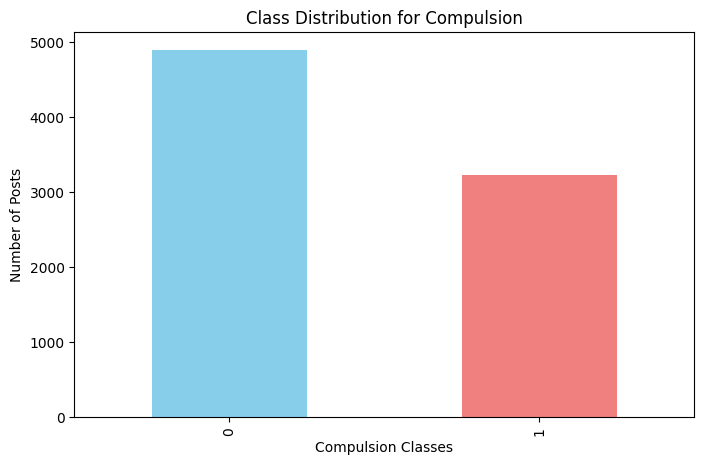

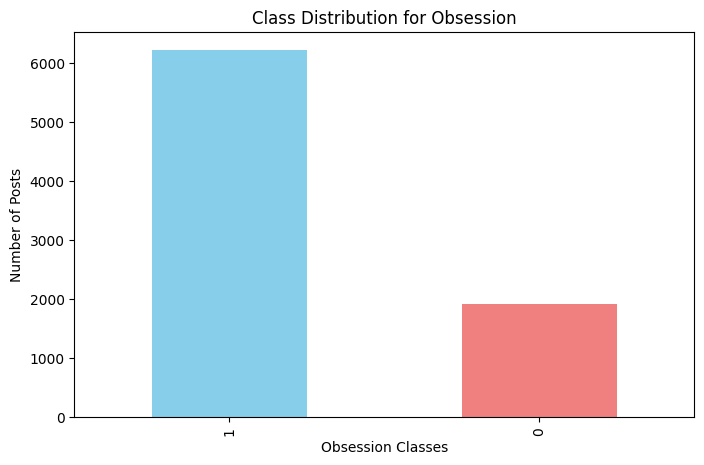

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
compulsion_distribution = df['compulsion'].value_counts()
obsession_distribution = df['obsession'].value_counts()

# Plotting class distribution for 'compulsion'
plt.figure(figsize=(8, 5))
compulsion_distribution.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Class Distribution for Compulsion')
plt.xlabel('Compulsion Classes')
plt.ylabel('Number of Posts')
plt.show()

# Plotting class distribution for 'obsession'
plt.figure(figsize=(8, 5))
obsession_distribution.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Class Distribution for Obsession')
plt.xlabel('Obsession Classes')
plt.ylabel('Number of Posts')
plt.show()


#### 2 TEXT LENGTH ANALYSIS

Character count summary:
count    8130.000000
mean      899.727306
std       737.293521
min        21.000000
25%       413.000000
50%       691.000000
75%      1144.000000
max      5405.000000
Name: char_count, dtype: float64

Word count summary:
count    8130.000000
mean      135.530627
std       110.499729
min         3.000000
25%        62.000000
50%       104.000000
75%       171.000000
max       836.000000
Name: word_count, dtype: float64


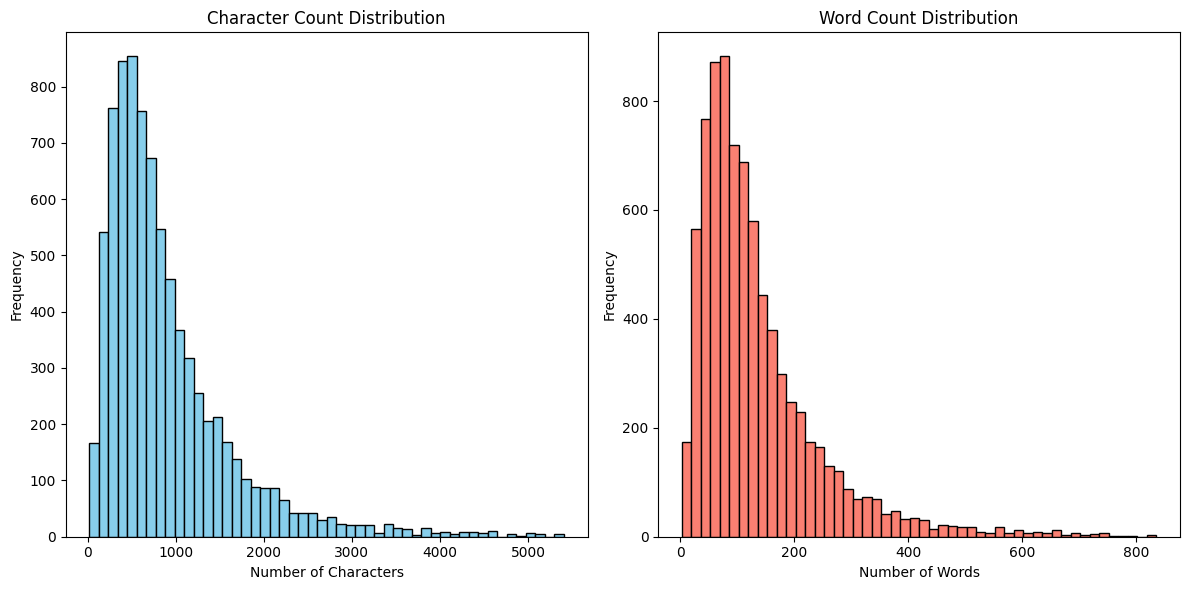

In [24]:
import matplotlib.pyplot as plt

# Calculate the length of each post in terms of characters and words
df['char_count'] = df['post'].apply(len)
df['word_count'] = df['post'].apply(lambda x: len(x.split()))

# Display summary statistics
print("Character count summary:")
print(df['char_count'].describe())

print("\nWord count summary:")
print(df['word_count'].describe())

# Plot histograms of text lengths
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['char_count'], bins=50, color='skyblue', edgecolor='black')
plt.title('Character Count Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['word_count'], bins=50, color='salmon', edgecolor='black')
plt.title('Word Count Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Most common words:
[('thought', 20418), ('ocd', 18289), ('like', 13660), ('feel', 12838), ('would', 10747), ('know', 10522), ('thing', 9182), ('time', 9175), ('get', 9162), ('really', 8675)]


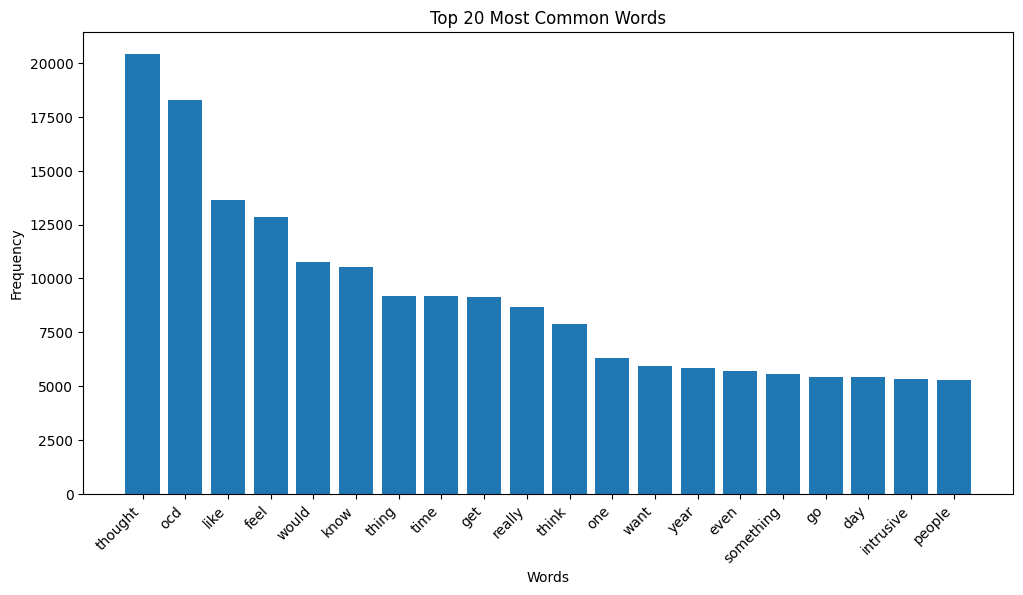

In [32]:
text_data = ' '.join(df['post'])

# Tokenize the text into words
words = nltk.word_tokenize(text_data)

word_freq = Counter(words)

print("Most common words:")
print(word_freq.most_common(10))  # You can adjust the number to display more or fewer words

# Plot a bar chart of word frequencies
plt.figure(figsize=(12, 6))
plt.bar(*zip(*word_freq.most_common(20)))
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 4. N-gram analysis

<Figure size 1200x600 with 0 Axes>

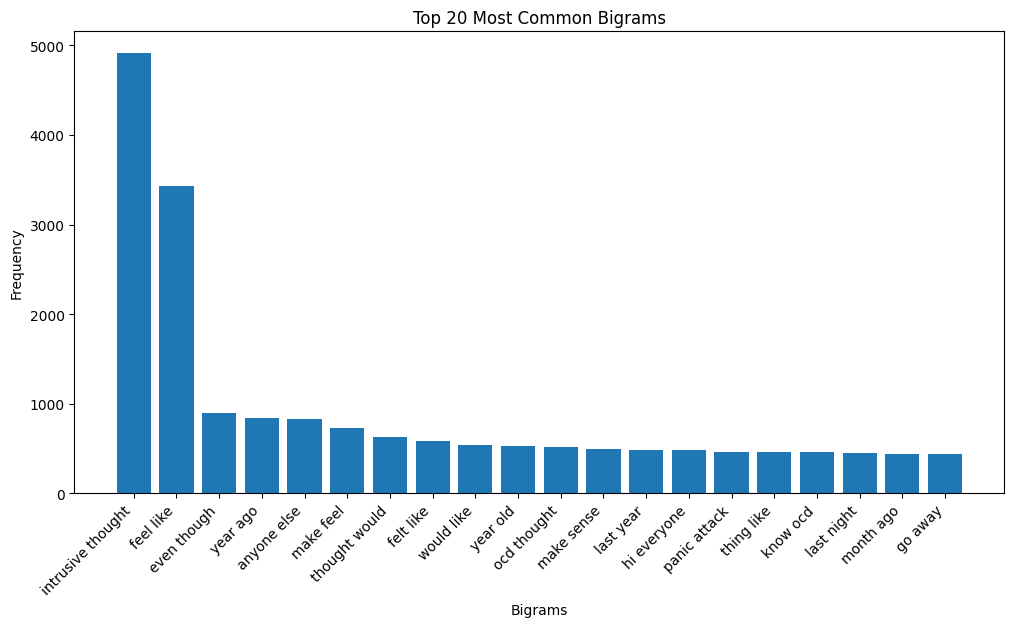

In [46]:
from nltk import ngrams
from nltk.corpus import stopwords
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt


text_data = ' '.join(df['post'])

words = text_data.split()


# Generate bigrams
bigrams = ngrams(words, 2)

# Calculate bigram frequencies
bigram_freq = Counter(bigrams)
bigram_freq

plt.figure(figsize=(12, 6))

x_values, y_values = zip(*bigram_freq.most_common(20))

x_values_flat = [' '.join(item) for item in x_values]


plt.figure(figsize=(12, 6))
plt.bar(x_values_flat, y_values)
plt.title('Top 20 Most Common Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


##### 6. TEXT AND LABEL CORRELATION

C:\Users\bkj\AppData\Local\Temp\ipykernel_1532\3278474128.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['compulsion_label'] = label_encoder_compulsion.fit_transform(data['compulsion'])
C:\Users\bkj\AppData\Local\Temp\ipykernel_1532\3278474128.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['obsession_label'] = label_encoder_obsession.fit_transform(data['obsession'])


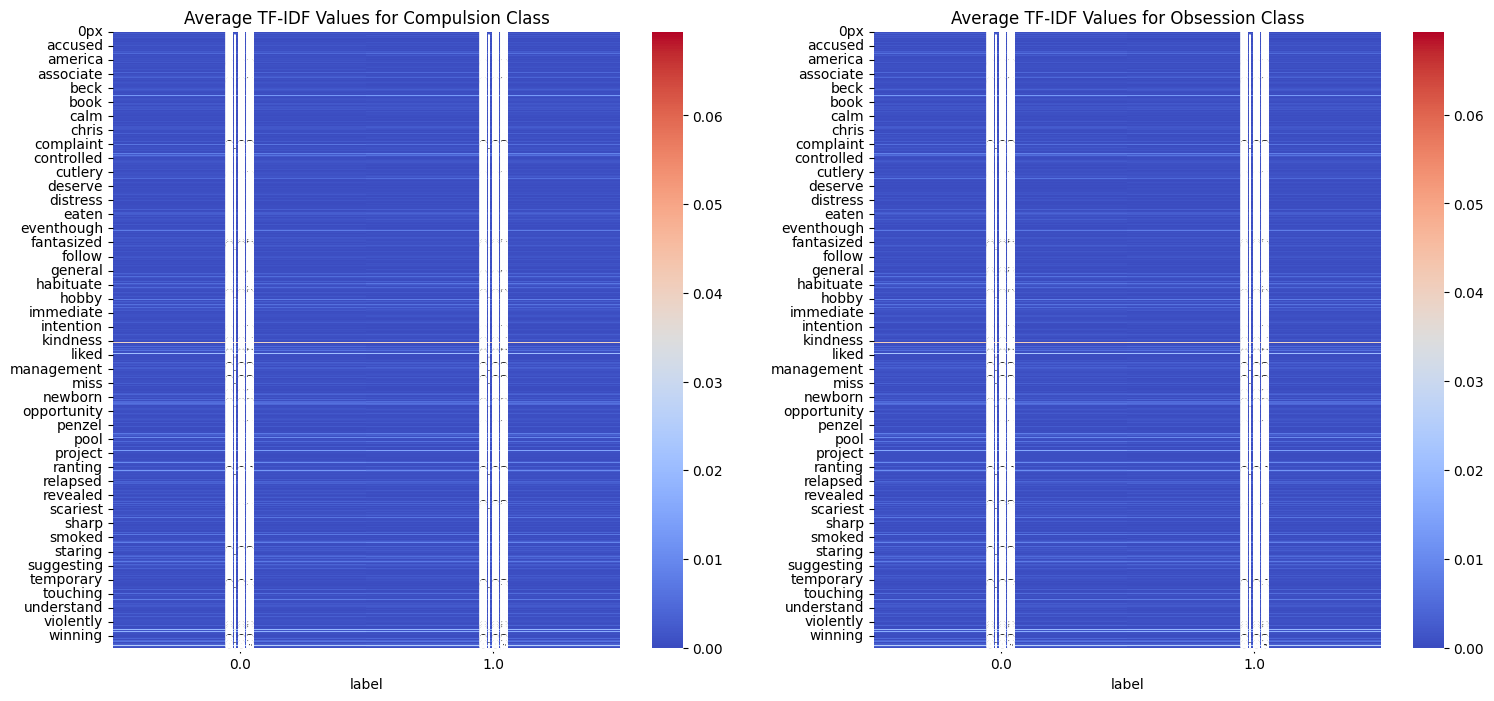

In [55]:
data = df[['post', 'compulsion', 'obsession']]

# Label encoding for both categorical labels
label_encoder_compulsion = LabelEncoder()
label_encoder_obsession = LabelEncoder()

data['compulsion_label'] = label_encoder_compulsion.fit_transform(data['compulsion'])
data['obsession_label'] = label_encoder_obsession.fit_transform(data['obsession'])

# Split the data into training and testing sets for both classes
X_train_comp, X_test_comp, y_train_comp, y_test_comp = train_test_split(data['post'], data['compulsion_label'], test_size=0.2, random_state=42)
X_train_obs, X_test_obs, y_train_obs, y_test_obs = train_test_split(data['post'], data['obsession_label'], test_size=0.2, random_state=42)

# TF-IDF Vectorization for both classes
tfidf_vectorizer_comp = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf_comp = tfidf_vectorizer_comp.fit_transform(X_train_comp)
X_test_tfidf_comp = tfidf_vectorizer_comp.transform(X_test_comp)

tfidf_vectorizer_obs = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf_obs = tfidf_vectorizer_obs.fit_transform(X_train_obs)
X_test_tfidf_obs = tfidf_vectorizer_obs.transform(X_test_obs)

# Calculate average TF-IDF values for both classes
average_tfidf_by_class_comp = pd.DataFrame(X_train_tfidf_comp.toarray(), columns=tfidf_vectorizer_comp.get_feature_names_out())
average_tfidf_by_class_comp['label'] = y_train_comp
average_tfidf_by_class_comp = average_tfidf_by_class_comp.groupby('label').mean()

average_tfidf_by_class_obs = pd.DataFrame(X_train_tfidf_obs.toarray(), columns=tfidf_vectorizer_obs.get_feature_names_out())
average_tfidf_by_class_obs['label'] = y_train_obs
average_tfidf_by_class_obs = average_tfidf_by_class_obs.groupby('label').mean()

# Visualize the average TF-IDF values for both classes
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
sns.heatmap(average_tfidf_by_class_comp.T, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Average TF-IDF Values for Compulsion Class')

plt.subplot(1, 2, 2)
sns.heatmap(average_tfidf_by_class_obs.T, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Average TF-IDF Values for Obsession Class')
plt.show()

##### 6.WORD2VEC

In [80]:
import gensim
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [81]:
wv = api.load('word2vec-google-news-300')
wv

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [82]:
wv.save('word2vec-google-news-300.kv')

In [88]:
wv.similarity("apple","car")

0.12830707

In [89]:
pairs = [
    ('car','minivan'),
    ('car','bicycle'),
    ('car','airplane'),
    ('car','cereal'),
    ('car','communism')
]

for w1,w2 in pairs:
    print(w1,w2,wv.similarity(w1,w2))

car minivan 0.6907037
car bicycle 0.5364484
car airplane 0.42435578
car cereal 0.13924746
car communism 0.058202934


In [90]:
wv.most_similar(positive=['car','minivan'],topn=5)

[('SUV', 0.8532192707061768),
 ('vehicle', 0.8175783753395081),
 ('pickup_truck', 0.7763688564300537),
 ('Jeep', 0.7567334175109863),
 ('Ford_Explorer', 0.7565720081329346)]

In [91]:
wv.doesnt_match(['fire','water','land','sea','car'])

'car'

In [94]:
words = ['one','two','man','woman','table']
sample_vectors = np.array([wv[word] for word in words])
pca = PCA(n_components=2)
result = pca.fit_transform(sample_vectors)
result

array([[ 0.41775945,  0.906729  ],
       [ 0.52036536,  1.3947775 ],
       [-1.2547548 , -0.3259122 ],
       [-1.6043063 , -0.64717937],
       [ 1.920937  , -1.328415  ]], dtype=float32)

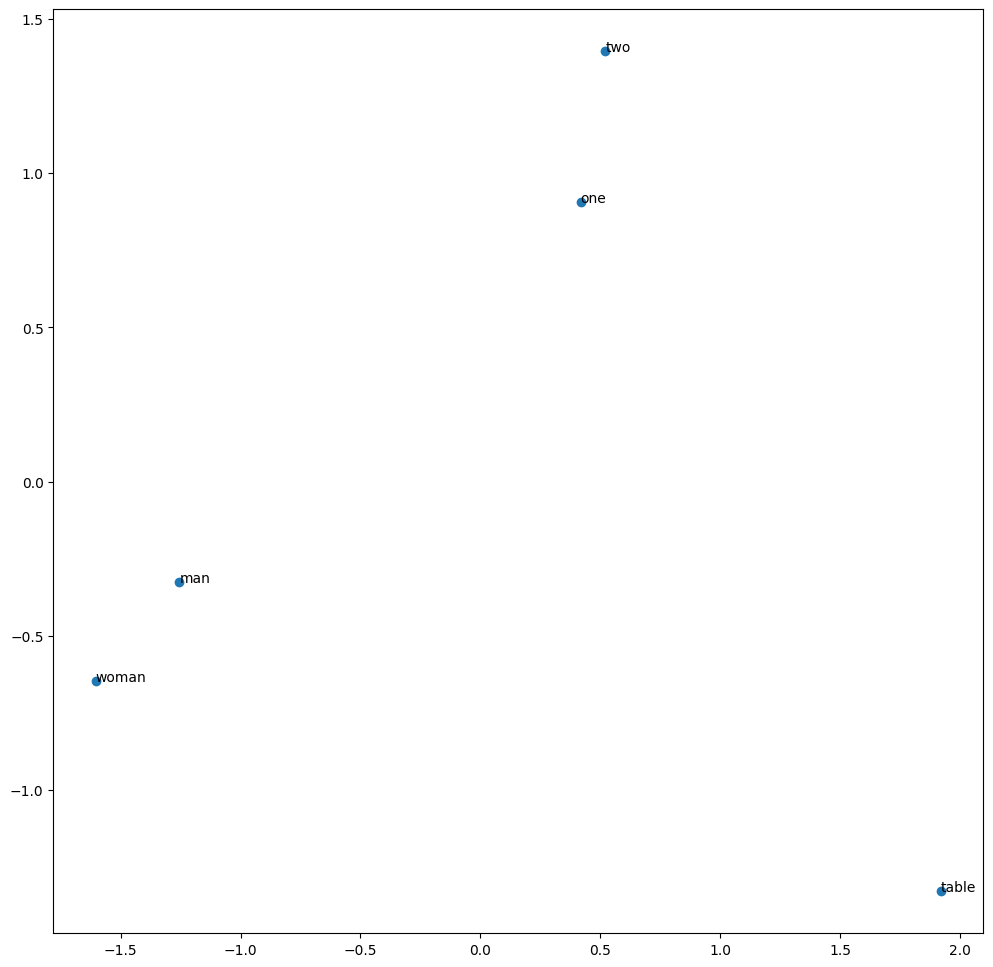

In [95]:
plt.figure(figsize=(12,12))
plt.scatter(result[:,0],result[:,1])
for i,word in enumerate(words):
    plt.annotate(word,xy=(result[i,0],result[i,1]))
plt.show()

In [100]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    count = 1
    for w in sent:
        if w in wv:
            count += 1
            wv_res += wv[w]
    wv_res = wv_res/count
    return wv_res

In [102]:
data

,post,compulsion,obsession
0,hi since december since recovering prozac sinc...,0,1
1,hi hope wonderful bank holiday whatever howeve...,1,1
2,hi first hope everyone managed joy happiness c...,0,1
3,hello everyone could really use help right ide...,0,1
4,though come many flavor one common ocd theme s...,1,1
...,...,...,...
8125,good morning always found ocd get worse stress...,0,1
8126,terror felt child playing street year diagnose...,0,1
8127,hi started 2 ocd 10 13 year ago difficult bear...,0,1
8128,hi everyone small true story happened recently...,1,0


#### embedding post from post-ontology-label.csv

In [103]:
data_ontology = pd.read_csv('post-ontology-label.csv')
data_ontology

,post,prefLabel,compulsion,obsession
0,Hi -\nSo I haven't been on here since December...,"['depression', 'weight gain', 'Medication', 'a...",0,1
1,"Hi all, hope you're all having a wonderful ban...","['compulsion', 'anger', 'symptom', 'compassion...",1,1
2,"Hi, \nFirst, I hope everyone managed to have s...","['hope', 'happiness', 'guilt', 'fear', 'obsess...",0,1
3,Hello everyone. I could really use your help r...,"['Treatment', 'hope', 'Thought', 'obsession', ...",0,1
4,"Though it comes in many flavors, one of the mo...","['quality', 'Intrusive thoughts', 'fall', 'beh...",1,1
...,...,...,...,...
8125,"Good morning,\nI have always found that my OCD...","['surprise', 'Intrusive thoughts', 'Thought', ...",0,1
8126,The terror I felt when there were children pla...,"['OCD', 'talking', 'Intrusive thoughts', 'Thou...",0,1
8127,"Hi, I've started 2 have ocd when i was 10 whic...","['washing hands', 'object', 'fall', 'obsession...",0,1
8128,"Hi Everyone,\nA small true story that happened...","['Thought', 'drop', 'Rituals', 'OCD', 'compuls...",1,0


In [104]:
data_ontology['post'] = data_ontology['post'].apply(process_text)

In [111]:
data_ontology['embeddings'] = data_ontology['post'].apply(lambda x:sent_vec(x))
data_ontology

,post,prefLabel,compulsion,obsession,embeddings
0,hi since december since recovering prozac sinc...,"['depression', 'weight gain', 'Medication', 'a...",0,1,"[-0.16524079198923716, 0.10704945605567094, -0..."
1,hi hope wonderful bank holiday whatever howeve...,"['compulsion', 'anger', 'symptom', 'compassion...",1,1,"[-0.17338186697738386, 0.11479262372975245, -0..."
2,hi first hope everyone managed joy happiness c...,"['hope', 'happiness', 'guilt', 'fear', 'obsess...",0,1,"[-0.1638438451468817, 0.11151430183100242, 0.0..."
3,hello everyone could really use help right ide...,"['Treatment', 'hope', 'Thought', 'obsession', ...",0,1,"[-0.16900181982566764, 0.12349603579376854, -0..."
4,though come many flavor one common ocd theme s...,"['quality', 'Intrusive thoughts', 'fall', 'beh...",1,1,"[-0.1723034636207177, 0.1185389549341392, -0.0..."
...,...,...,...,...,...
8125,good morning always found ocd get worse stress...,"['surprise', 'Intrusive thoughts', 'Thought', ...",0,1,"[-0.17359292098666276, 0.11597117011049454, -0..."
8126,terror felt child playing street year diagnose...,"['OCD', 'talking', 'Intrusive thoughts', 'Thou...",0,1,"[-0.16348753511235956, 0.11635220988412921, -0..."
8127,hi started 2 ocd 10 13 year ago difficult bear...,"['washing hands', 'object', 'fall', 'obsession...",0,1,"[-0.17108675752644426, 0.119579690757857, -0.0..."
8128,hi everyone small true story happened recently...,"['Thought', 'drop', 'Rituals', 'OCD', 'compuls...",1,0,"[-0.17458937424879808, 0.11257662259615385, -0..."


In [130]:
data_ontology_compulsion = data_ontology[data_ontology['compulsion'] == 1]
data_ontology_obsession = data_ontology[data_ontology['obsession'] == 1]
data_ontology_compulsion

,post,prefLabel,compulsion,obsession,embeddings
1,hi hope wonderful bank holiday whatever howeve...,"['compulsion', 'anger', 'symptom', 'compassion...",1,1,"[-0.17338186697738386, 0.11479262372975245, -0..."
4,though come many flavor one common ocd theme s...,"['quality', 'Intrusive thoughts', 'fall', 'beh...",1,1,"[-0.1723034636207177, 0.1185389549341392, -0.0..."
5,hey first sorry english germany hope everybody...,"['hope', 'obsession', 'anxiety', 'anxiety', 'O...",1,1,"[-0.16896591461952842, 0.11819160544054604, -0..."
9,cured ocd still process made ton progress ther...,"['sadness', 'interest', 'object', 'fear', 'sym...",1,0,"[-0.16517332772959395, 0.11154646247260586, -0..."
12,probably three area struggle term ocd obsessio...,"['obsession', 'compulsion', 'Compulsive behavi...",1,1,"[-0.16371979013374308, 0.11189958989785319, 0...."
...,...,...,...,...,...
8114,hold u back purely simply connecting giving me...,"['OCD', 'Thought', 'urge', 'compulsion']",1,0,"[-0.17764479488474336, 0.09608697347314639, -0..."
8115,gotten bit anxious last couple day need applie...,"['outside', 'anxiety', 'anxiety', 'kitchen', '...",1,0,"[-0.16278283389998072, 0.10656361521026235, -0..."
8116,thanks legend concept spending little time lea...,"['OCD', 'compulsion', 'talking']",1,0,"[-0.15978256182113604, 0.08507257445245726, -0..."
8128,hi everyone small true story happened recently...,"['Thought', 'drop', 'Rituals', 'OCD', 'compuls...",1,0,"[-0.17458937424879808, 0.11257662259615385, -0..."


In [114]:
data_ontology_obsession

,post,prefLabel,compulsion,obsession,embeddings
0,hi since december since recovering prozac sinc...,"['depression', 'weight gain', 'Medication', 'a...",0,1,"[-0.16524079198923716, 0.10704945605567094, -0..."
1,hi hope wonderful bank holiday whatever howeve...,"['compulsion', 'anger', 'symptom', 'compassion...",1,1,"[-0.17338186697738386, 0.11479262372975245, -0..."
2,hi first hope everyone managed joy happiness c...,"['hope', 'happiness', 'guilt', 'fear', 'obsess...",0,1,"[-0.1638438451468817, 0.11151430183100242, 0.0..."
3,hello everyone could really use help right ide...,"['Treatment', 'hope', 'Thought', 'obsession', ...",0,1,"[-0.16900181982566764, 0.12349603579376854, -0..."
4,though come many flavor one common ocd theme s...,"['quality', 'Intrusive thoughts', 'fall', 'beh...",1,1,"[-0.1723034636207177, 0.1185389549341392, -0.0..."
...,...,...,...,...,...
8123,going university semester told friend embarras...,"['OCD', 'obsession', 'regret', 'guilt']",0,1,"[-0.1665551035027755, 0.10978297183388158, 0.0..."
8124,hello name archer new member forum would like ...,"['depression', 'blister', 'behavior', 'disgust...",0,1,"[-0.1653307269568145, 0.10766486265864816, 0.0..."
8125,good morning always found ocd get worse stress...,"['surprise', 'Intrusive thoughts', 'Thought', ...",0,1,"[-0.17359292098666276, 0.11597117011049454, -0..."
8126,terror felt child playing street year diagnose...,"['OCD', 'talking', 'Intrusive thoughts', 'Thou...",0,1,"[-0.16348753511235956, 0.11635220988412921, -0..."


In [141]:
compulsion_datapoint = data_ontology_compulsion['embeddings']
compulsion_datapoint = np.vstack(compulsion_datapoint.tolist())
compulsion_datapoint

array([[-1.73381867e-01,  1.14792624e-01, -5.82929019e-03, ...,
        -2.83717074e-02, -1.18043365e-01,  1.49133360e-01],
       [-1.72303464e-01,  1.18538955e-01, -1.51447121e-03, ...,
        -1.99464267e-02, -1.09338845e-01,  1.57684220e-01],
       [-1.68965915e-01,  1.18191605e-01, -6.14730890e-03, ...,
        -3.36372017e-02, -1.20064856e-01,  1.56890814e-01],
       ...,
       [-1.59782562e-01,  8.50725745e-02, -1.21722534e-04, ...,
        -2.22557481e-02, -1.30378049e-01,  1.32984303e-01],
       [-1.74589374e-01,  1.12576623e-01, -4.85689603e-03, ...,
        -2.53425481e-02, -1.16293945e-01,  1.56527663e-01],
       [-1.75833962e-01,  1.13159899e-01,  9.00011673e-03, ...,
        -2.81398786e-02, -1.21447220e-01,  1.60065930e-01]])

In [142]:
pca = PCA(n_components=2)

In [143]:
reduced_compulsion_datapoint = pca.fit_transform(compulsion_datapoint)

In [144]:
reduced_compulsion_datapoint

array([[-0.00874111, -0.01439916],
       [ 0.09790735, -0.04294886],
       [ 0.02644474, -0.00057085],
       ...,
       [-0.10736611,  0.00382871],
       [ 0.02907321, -0.01326109],
       [-0.00328459, -0.01728943]])

In [145]:
obsession_datapoint = data_ontology_obsession['embeddings']
obsession_datapoint = np.vstack(obsession_datapoint.tolist())
obsession_datapoint

array([[-0.16524079,  0.10704946, -0.00568875, ..., -0.02318008,
        -0.12264833,  0.15422447],
       [-0.17338187,  0.11479262, -0.00582929, ..., -0.02837171,
        -0.11804337,  0.14913336],
       [-0.16384385,  0.1115143 ,  0.00053252, ..., -0.02666073,
        -0.11411104,  0.15630372],
       ...,
       [-0.17359292,  0.11597117, -0.003915  , ..., -0.0351764 ,
        -0.12132724,  0.15469009],
       [-0.16348754,  0.11635221, -0.00039117, ..., -0.03129801,
        -0.11387459,  0.15339438],
       [-0.17108676,  0.11957969, -0.00913586, ..., -0.03040544,
        -0.11795419,  0.15466919]])

In [147]:

reduced_obsession_datapoint = pca.fit_transform(obsession_datapoint)

In [149]:
reduced_obsession_datapoint

array([[-0.05168391,  0.00636727],
       [ 0.01295092, -0.0032498 ],
       [-0.0415446 ,  0.02379939],
       ...,
       [-0.01254826,  0.00843018],
       [-0.01099956,  0.01137353],
       [-0.00075939,  0.00682976]])

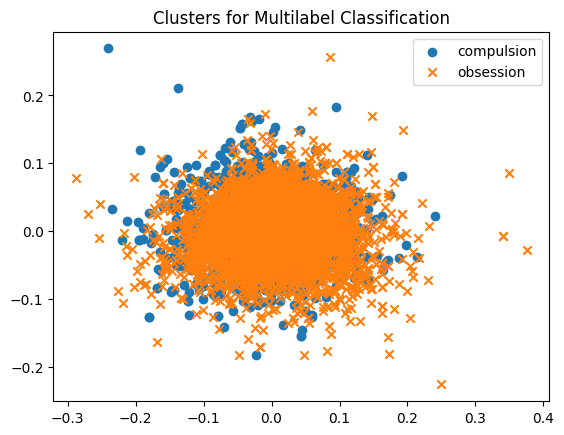

In [151]:
# Plot clusters for 'compulsion'
plt.scatter(reduced_compulsion_datapoint[:,0], reduced_compulsion_datapoint[:,1], label='compulsion', marker='o')

# Plot clusters for 'obsession'
plt.scatter(reduced_obsession_datapoint[:,0], reduced_obsession_datapoint[:, 1], label='obsession', marker='x')

plt.legend()
plt.title('Clusters for Multilabel Classification')
plt.show()

In [156]:
ontoly_embeddings = np.vstack(data_ontology['embeddings'].tolist())
ontoly_embeddings = pca.fit_transform(ontoly_embeddings)
ontoly_embeddings

array([[-0.05216456,  0.00867244],
       [ 0.01200636, -0.00522953],
       [-0.04013726,  0.02018728],
       ...,
       [-0.00269808,  0.00932022],
       [-0.02953478, -0.00348836],
       [ 0.00746604, -0.00947325]])

In [157]:
from sklearn.cluster import KMeans

# Assuming 'post_embeddings' is a NumPy array with shape (number_of_posts, embedding_dimension)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(ontoly_embeddings)


c:\Users\bkj\Documents\GitHub\projects\computer vision\cv-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


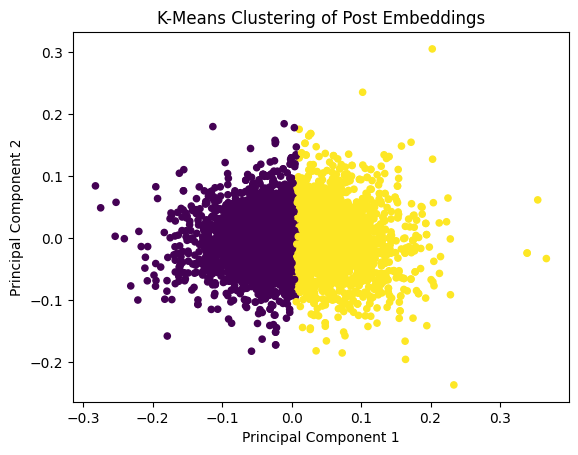

In [160]:
plt.scatter(ontoly_embeddings[:, 0], ontoly_embeddings[:, 1], c=clusters, cmap='viridis', s=20)
plt.title('K-Means Clustering of Post Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### embedding post from post-manual-label.csv

In [161]:
data_manual = pd.read_csv('post-manual-label.csv')
data_manual

,post,prefLabel,obsession_first_checker,compulsion_first_checker,expand1
0,"I grew up with obsessive thoughts, or more apt...","['site', 'compulsion', 'obsession', 'rash', 'p...",1.0,1.0,"Aggressive obsession, Contamination obsession,..."
1,I have been thinking so much about Covid becau...,"['singing', 'washing hands', 'anxiety', 'anxie...",0.0,1.0,"morbid thoughts, Mental image, Homicidal thoug..."
2,"I fed up, I send all day checking excessive ch...","['OCD', 'checking', 'Thought']",0.0,1.0,"morbid thoughts, Mental image, Homicidal thoug..."
3,I’ve noticed that I’ve been washing my hands m...,"['washing hands', 'hope', 'depression', 'OCD']",1.0,0.0,NaN
4,This sounds so stupid\nAt the moment I want to...,['Thought'],1.0,1.0,"morbid thoughts, Mental image, Homicidal thoug..."
...,...,...,...,...,...
23451,Does anyone else feel like when trying to stop...,"['talking', 'Thought']",NaN,NaN,"morbid thoughts, Mental image, Homicidal thoug..."
23452,So for the past year or two I have had repetat...,['Thought'],NaN,NaN,"morbid thoughts, Mental image, Homicidal thoug..."
23453,Hi Guys I havent been around for a while went ...,['hope'],NaN,NaN,NaN
23454,My little baby is due in 2 weeks exactly (hopi...,"['Thought', 'joy', 'hope', 'process']",NaN,NaN,"morbid thoughts, Mental image, Homicidal thoug..."


In [165]:
data_manual['post'] = data_manual['post'].apply(lambda x: process_text(str(x)))
data_manual

,post,prefLabel,obsession_first_checker,compulsion_first_checker,expand1
0,grew obsessive thought aptly intrusive thought...,"['site', 'compulsion', 'obsession', 'rash', 'p...",1.0,1.0,"Aggressive obsession, Contamination obsession,..."
1,thinking much covid part job well right concer...,"['singing', 'washing hands', 'anxiety', 'anxie...",0.0,1.0,"morbid thoughts, Mental image, Homicidal thoug..."
2,fed send day checking excessive checking every...,"['OCD', 'checking', 'Thought']",0.0,1.0,"morbid thoughts, Mental image, Homicidal thoug..."
3,noticed washing hand lately thing triggering n...,"['washing hands', 'hope', 'depression', 'OCD']",1.0,0.0,NaN
4,sound stupid moment want download window live ...,['Thought'],1.0,1.0,"morbid thoughts, Mental image, Homicidal thoug..."
...,...,...,...,...,...
23451,anyone else feel like trying stop ruminating t...,"['talking', 'Thought']",NaN,NaN,"morbid thoughts, Mental image, Homicidal thoug..."
23452,past year two repetative thought mainly brain ...,['Thought'],NaN,NaN,"morbid thoughts, Mental image, Homicidal thoug..."
23453,hi guy around went back old med highest doze s...,['hope'],NaN,NaN,NaN
23454,little baby due 2 week exactly hoping go perfe...,"['Thought', 'joy', 'hope', 'process']",NaN,NaN,"morbid thoughts, Mental image, Homicidal thoug..."


In [166]:
data_manual['embeddings'] = data_manual['post'].apply(lambda x: sent_vec(x))

In [168]:
data_manual_compulsion = data_manual[data_manual['compulsion_first_checker'] == 1]
data_manual_obsession = data_manual[data_manual['obsession_first_checker'] == 1]
data_manual_obsession

,post,prefLabel,obsession_first_checker,compulsion_first_checker,expand1,embeddings
0,grew obsessive thought aptly intrusive thought...,"['site', 'compulsion', 'obsession', 'rash', 'p...",1.0,1.0,"Aggressive obsession, Contamination obsession,...","[-0.1744697856628242, 0.11611076596834474, -0...."
3,noticed washing hand lately thing triggering n...,"['washing hands', 'hope', 'depression', 'OCD']",1.0,0.0,NaN,"[-0.1724181269256162, 0.11826292226012323, -0...."
4,sound stupid moment want download window live ...,['Thought'],1.0,1.0,"morbid thoughts, Mental image, Homicidal thoug...","[-0.17584067189220814, 0.11644781843681168, -0..."
5,get wrong getting much worse room today tappin...,['Thought'],1.0,0.0,"morbid thoughts, Mental image, Homicidal thoug...","[-0.16860491164187166, 0.11007138516040559, -0..."
6,risk however small tomorrow walk bus risk may ...,"['anger', 'unknown', 'anxiety', 'anxiety', 'wa...",1.0,0.0,"castration anxiety, performance anxiety, koro,...","[-0.1761233721892846, 0.1035890530813769, -0.0..."
...,...,...,...,...,...,...
480,hello got appointment see cbt therapist couple...,"['OCD', 'washing hands', 'outside', 'fear']",1.0,1.0,"terror, panic, panic, moral panic","[-0.17237814410242017, 0.11335276224893961, -0..."
482,morning cleaning aquarium light unit slipped b...,"['anxiety', 'anxiety', 'joy']",1.0,0.0,"castration anxiety, performance anxiety, koro,...","[-0.16597615985970224, 0.11371137209587696, -0..."
484,well started like happy iam 8 month prego anyw...,"['OCD', 'Thought']",1.0,0.0,"morbid thoughts, Mental image, Homicidal thoug...","[-0.17996266804333233, 0.11796784685448986, -0..."
489,told bf next want tell family ocd know always ...,"['Thought', 'guilt', 'writing', 'OCD']",1.0,0.0,"morbid thoughts, Mental image, Homicidal thoug...","[-0.168585205078125, 0.119691162109375, -0.005..."


In [171]:
data_manual_obsession_datapoint = np.vstack(data_manual_obsession['embeddings'].tolist())
data_manual_obsession_datapoint

array([[-0.17446979,  0.11611077, -0.00638178, ..., -0.02716346,
        -0.10601297,  0.15936851],
       [-0.17241813,  0.11826292, -0.00476074, ..., -0.0308384 ,
        -0.12850668,  0.15365093],
       [-0.17584067,  0.11644782, -0.01360197, ..., -0.04137377,
        -0.11274242,  0.14377033],
       ...,
       [-0.17996267,  0.11796785, -0.01440692, ..., -0.03620914,
        -0.1169084 ,  0.14758898],
       [-0.16858521,  0.11969116, -0.00561471, ..., -0.03584856,
        -0.12425851,  0.14780744],
       [-0.17361667,  0.12433313, -0.01006647, ..., -0.02165195,
        -0.10572589,  0.16353467]])

In [172]:
data_manual_compulsion_datapoint = np.vstack(data_manual_compulsion['embeddings'].tolist())
data_manual_compulsion_datapoint

array([[-0.17446979,  0.11611077, -0.00638178, ..., -0.02716346,
        -0.10601297,  0.15936851],
       [-0.18050207,  0.09998431, -0.00331173, ..., -0.02368807,
        -0.12754925,  0.14395325],
       [-0.16456207,  0.10917955,  0.00962168, ..., -0.01215552,
        -0.11801588,  0.1499849 ],
       ...,
       [-0.16872604,  0.10628142, -0.00186835, ..., -0.02335499,
        -0.11903212,  0.14421025],
       [-0.16865333,  0.10322431,  0.00240566, ..., -0.02918316,
        -0.12594071,  0.15238213],
       [-0.17237814,  0.11335276, -0.02371112, ..., -0.02922743,
        -0.1163581 ,  0.14309041]])

In [173]:
reduced_data_manual_compulsion_datapoint = pca.fit_transform(data_manual_compulsion_datapoint)
reduced_data_manual_obsession_datapoint = pca.fit_transform(data_manual_obsession_datapoint)

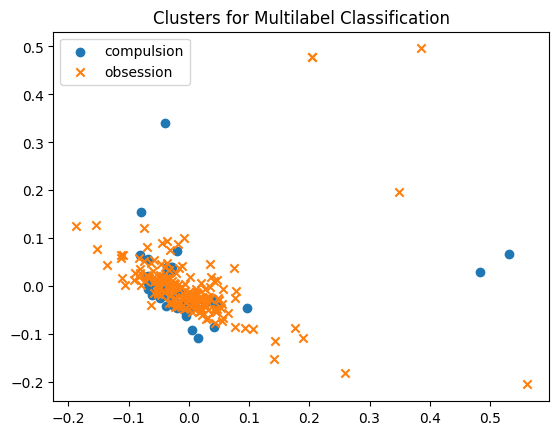

In [174]:
# Plot clusters for 'compulsion'
plt.scatter(reduced_data_manual_compulsion_datapoint[:,0], reduced_data_manual_compulsion_datapoint[:,1], label='compulsion', marker='o')

# Plot clusters for 'obsession'
plt.scatter(reduced_data_manual_obsession_datapoint[:,0], reduced_data_manual_obsession_datapoint[:, 1], label='obsession', marker='x')

plt.legend()
plt.title('Clusters for Multilabel Classification')
plt.show()

In [176]:
test_split = 0.2

# Initial train and test split.
train_df, test_df = train_test_split(data_ontology, test_size=test_split, stratify=data_ontology[['compulsion', 'obsession']].values, )
test_df,val_df = train_test_split(test_df,test_size=0.5,stratify=test_df[['compulsion', 'obsession']].values)
# Splitting the test set further into validation and new test sets.
# val_df = test_df.sample(frac=0.5)
# test_df.drop(val_df.index, inplace=True)

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

Number of rows in training set: 6504
Number of rows in validation set: 813
Number of rows in test set: 813


### TRAIN MODELS 

In [177]:
x_train,y_train = train_df['embeddings'], train_df[['compulsion', 'obsession']]
x_test,y_test = test_df['embeddings'], test_df[['compulsion', 'obsession']]
x_val,y_val = val_df['embeddings'], val_df[['compulsion', 'obsession']]


In [193]:
y_train.values

array([[1, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=int64)

In [194]:
x_train,y_train = np.vstack(x_train),y_train.values
x_test,y_test = np.vstack(x_test),y_test.values
x_val,y_val = np.vstack(x_val),y_val.values

In [197]:
assert x_train.shape[0] == y_train.shape[0]

###### 1. USING SUPPORT VECTOR MACHINE

In [200]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import multilabel_confusion_matrix


# pca = PCA(n_components=100)
# x_train_pca = pca.fit_transform(x_train)
# x_test_pca = pca.transform(x_test)

svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Wrap the SVM model with MultiOutputClassifier
multioutput_svm = MultiOutputClassifier(svm_model)

# Train the model
multioutput_svm.fit(x_train, y_train)

# Make predictions on the test set
y_pred = multioutput_svm.predict(x_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = multilabel_confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)



Accuracy: 0.6076260762607626
Confusion Matrix:
 [[[488   2]
  [308  15]]

 [[  0 191]
  [  0 622]]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.05      0.09       323
           1       0.77      1.00      0.87       622

   micro avg       0.77      0.67      0.72       945
   macro avg       0.82      0.52      0.48       945
weighted avg       0.81      0.67      0.60       945
 samples avg       0.77      0.70      0.72       945



In [202]:
import joblib

# Save the trained model to a file
joblib.dump(multioutput_svm, 'classical_models/multioutput_svm_model.joblib')




['classical_models/multioutput_svm_model.joblib']

In [213]:
test_data = pd.read_excel('test_data.xlsx')
test_data['post'] = test_data['post'].apply(lambda x: process_text(str(x)))
test_data['embeddings'] = test_data['post'].apply(sent_vec)
test_data

,post,prefLabel,obsession_first_checker,compulsion_first_checker,expand1,embeddings
0,grew obsessive thought aptly intrusive thought...,"['site', 'compulsion', 'obsession', 'rash', 'p...",1,1,"Aggressive obsession, Contamination obsession,...","[-0.17451321348852042, 0.11636904168754555, -0..."
1,thinking much covid part job well right concer...,"['singing', 'washing hands', 'anxiety', 'anxie...",0,1,"morbid thoughts, Mental image, Homicidal thoug...","[-0.18013892080269608, 0.0978826784620098, -0...."
2,fed send day checking excessive checking every...,"['OCD', 'checking', 'Thought']",0,1,"morbid thoughts, Mental image, Homicidal thoug...","[-0.1645620709898844, 0.10917954637825145, 0.0..."
3,noticed washing hand lately thing triggering n...,"['washing hands', 'hope', 'depression', 'OCD']",1,0,NaN,"[-0.1724181269256162, 0.11826292226012323, -0...."
4,sound stupid moment want download window live ...,['Thought'],1,1,"morbid thoughts, Mental image, Homicidal thoug...","[-0.17584067189220814, 0.11644781843681168, -0..."
...,...,...,...,...,...,...
491,http http buddhist podcast chanting beginning ...,"['interest', 'Thought', 'OCD', 'cognitive proc...",0,0,"morbid thoughts, Mental image, Homicidal thoug...","[-0.17718669492501676, 0.11111851096472855, -0..."
492,hi lot helpful topic forum previous discussion...,['OCD'],0,0,NaN,"[-0.1633548573551015, 0.10695576464009081, 0.0..."
493,aww guy sorry feel always mithering everyone i...,"['OCD', 'sadness', 'weakness', 'anxiety', 'anx...",0,0,"castration anxiety, performance anxiety, koro,...","[-0.16804268194852504, 0.11303954382567664, -0..."
494,name ian suffered ocd life become problem last...,"['OCD', 'hope', 'fear']",1,0,"terror, panic, panic, moral panic","[-0.17361666888174926, 0.12433312771588388, -0..."


In [220]:
y_train

array([[1, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=int64)

##### 2. USING A LOGISTICS MODEL

In [225]:
logreg_model = LogisticRegression(random_state=42)

# Wrap the Logistic Regression model with MultiOutputClassifier
multioutput_logreg = MultiOutputClassifier(logreg_model)

# Train the model
multioutput_logreg.fit(x_train, y_train)

# Make predictions on the test set
y_pred = multioutput_logreg.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = multilabel_confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.5940959409594095
Confusion Matrix:
 [[[460  30]
  [265  58]]

 [[  1 190]
  [  0 622]]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.18      0.28       323
           1       0.77      1.00      0.87       622

   micro avg       0.76      0.72      0.74       945
   macro avg       0.71      0.59      0.57       945
weighted avg       0.73      0.72      0.67       945
 samples avg       0.77      0.74      0.74       945



##### 3. using an LSTM 

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

from keras.optimizers import Adam

# Build the LSTM model with a custom optimizer
custom_optimizer = Adam(learning_rate=0.0001)
x_train_reshaped = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(16, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.5))
model.add(LSTM(8))
model.add(Dense(4))
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Now you can train the model
model.fit(x_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)


##### USING TRANSFORMERS

In [239]:
test_split = 0.2

# Initial train and test split.
train_df, test_df = train_test_split(data_ontology, test_size=test_split, stratify=data_ontology[['compulsion', 'obsession']].values, )
test_df,val_df = train_test_split(test_df,test_size=0.5,stratify=test_df[['compulsion', 'obsession']].values)
# Splitting the test set further into validation and new test sets.
# val_df = test_df.sample(frac=0.5)
# test_df.drop(val_df.index, inplace=True)

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

Number of rows in training set: 6504
Number of rows in validation set: 813
Number of rows in test set: 813


In [241]:
train_x,train_y = train_df['post'], train_df[['compulsion','obsession']]
test_x,test_y = test_df['post'], test_df[['compulsion','obsession']]
val_x,val_y = val_df['post'], val_df[['compulsion','obsession']]

In [244]:

# Load BERT tokenizer and model
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = TFAutoModelForSequenceClassification.from_pretrained(model_name)

# Tokenize and encode the training and testing texts
train_encodings = tokenizer(train_x.tolist(), truncation=True, padding=True, max_length=128, return_tensors='tf')
test_encodings = tokenizer(test_x.tolist(), truncation=True, padding=True, max_length=128, return_tensors='tf')
val_encodings = tokenizer(val_x.tolist(), truncation=True, padding=True, max_length=128, return_tensors='tf')

# Convert labels to TensorFlow tensors
train_labels = tf.convert_to_tensor(train_y, dtype=tf.int32)
test_labels = tf.convert_to_tensor(test_y, dtype=tf.int32)
val_labels = tf.convert_to_tensor(val_y, dtype=tf.int32)

# Convert Hugging Face tokenized inputs to numpy arrays
train_encodings = {key: np.array(value) for key, value in train_encodings.items()}
test_encodings = {key: np.array(value) for key, value in test_encodings.items()}
val_encodings = {key: np.array(value) for key, value in val_encodings.items()}
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)


history = model.fit(
    train_encodings,
    train_labels,
    validation_data=(val_encodings, val_labels),
    epochs=3,
    batch_size=32
)
predictions = model.predict(test_encodings)
predicted_labels = (tf.sigmoid(predictions.logits) > 0.5).numpy()  # Threshold for multi-label classification

# Evaluation
accuracy = accuracy_score(test_y, predicted_labels)
confusion_matrix = multilabel_confusion_matrix(test_y, predicted_labels)
classification_rep = classification_report(test_y, predicted_labels)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_rep)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
204/204 [==============================] - 12129s 59s/step - loss: 0.4857 - accuracy: 0.6971 - val_loss: 0.2275 - val_accuracy: 0.9225
Epoch 2/3
204/204 [==============================] - 10593s 52s/step - loss: 0.1668 - accuracy: 0.8990 - val_loss: 0.1588 - val_accuracy: 0.9090
Epoch 3/3
 36/204 [====>.........................] - ETA: 3:33:32 - loss: 0.1411 - accuracy: 0.8967

KeyboardInterrupt: 

In [250]:
def cosine_similarity(vector_a, vector_b):
    dot_product = np.dot(vector_a, vector_b)
    norm_a = np.linalg.norm(vector_a)
    norm_b = np.linalg.norm(vector_b)

    similarity = dot_product / (norm_a * norm_b)

    return similarity

In [259]:
predictions = model.predict(test_encodings)
predicted_labels = (tf.sigmoid(predictions.logits) > 0.5).numpy() 

26/26 [==============================] - 580s 22s/step


In [261]:
predicted_labels =  predicted_labels.astype('int')
predicted_labels

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]])

In [262]:
test_y

,compulsion,obsession
5825,0,1
1877,1,0
4513,0,1
4343,0,1
6544,1,1
...,...,...
3185,1,0
7179,1,0
2933,0,1
5162,1,0


In [267]:
new_test_dataframe = test_y.copy()
new_test_dataframe['compulsion_pred']  = predicted_labels[:,0]
new_test_dataframe['obsession_pred'] = predicted_labels[:,1]
new_test_dataframe

,compulsion,obsession,compulsion_pred,obsession_pred
5825,0,1,0,1
1877,1,0,1,0
4513,0,1,0,1
4343,0,1,0,1
6544,1,1,1,1
...,...,...,...,...
3185,1,0,1,0
7179,1,0,1,0
2933,0,1,0,1
5162,1,0,1,0


In [269]:
new_test_dataframe['post'] = test_x

In [270]:
new_test_dataframe

,compulsion,obsession,compulsion_pred,obsession_pred,post
5825,0,1,0,1,recently sure side effect fluvoxetine really d...
1877,1,0,1,0,hi apology anyone read similar post posted iss...
4513,0,1,0,1,hi really sorry long rant talked anybody year ...
4343,0,1,0,1,hello name lucy ocd linked depression year big...
6544,1,1,1,1,hello suppose writing need suggestion choking ...
...,...,...,...,...,...
3185,1,0,1,0,past month much better week seems like struggl...
7179,1,0,1,0,issue constant stream unwanted scary sometimes...
2933,0,1,0,1,hi know appreciate others suffering sick runni...
5162,1,0,1,0,everytime thought reach mind get blocked say c...


In [272]:
columns = list(new_test_dataframe.columns)
columns = [columns[-1]] + columns[:-1]
columns

['post', 'compulsion', 'obsession', 'compulsion_pred', 'obsession_pred']

In [273]:
new_test_dataframe = new_test_dataframe[columns]
new_test_dataframe

,post,compulsion,obsession,compulsion_pred,obsession_pred
5825,recently sure side effect fluvoxetine really d...,0,1,0,1
1877,hi apology anyone read similar post posted iss...,1,0,1,0
4513,hi really sorry long rant talked anybody year ...,0,1,0,1
4343,hello name lucy ocd linked depression year big...,0,1,0,1
6544,hello suppose writing need suggestion choking ...,1,1,1,1
...,...,...,...,...,...
3185,past month much better week seems like struggl...,1,0,1,0
7179,issue constant stream unwanted scary sometimes...,1,0,1,0
2933,hi know appreciate others suffering sick runni...,0,1,0,1
5162,everytime thought reach mind get blocked say c...,1,0,1,0


In [274]:
new_test_dataframe.to_excel('prediction_data/test_prediction.xlsx')

##### prediction on test_data.xlsx

In [279]:
manual_test = pd.read_excel('test_data.xlsx')
manual_test['post'] = manual_test['post'].apply(process_text)
manual_test['embedding'] = manual_test['post'].apply(lambda x: sent_vec(x))
manual_test

,post,prefLabel,obsession_first_checker,compulsion_first_checker,expand1,embedding
0,grew obsessive thought aptly intrusive thought...,"['site', 'compulsion', 'obsession', 'rash', 'p...",1,1,"Aggressive obsession, Contamination obsession,...","[-0.17451321348852042, 0.11636904168754555, -0..."
1,thinking much covid part job well right concer...,"['singing', 'washing hands', 'anxiety', 'anxie...",0,1,"morbid thoughts, Mental image, Homicidal thoug...","[-0.18013892080269608, 0.0978826784620098, -0...."
2,fed send day checking excessive checking every...,"['OCD', 'checking', 'Thought']",0,1,"morbid thoughts, Mental image, Homicidal thoug...","[-0.1645620709898844, 0.10917954637825145, 0.0..."
3,noticed washing hand lately thing triggering n...,"['washing hands', 'hope', 'depression', 'OCD']",1,0,NaN,"[-0.1724181269256162, 0.11826292226012323, -0...."
4,sound stupid moment want download window live ...,['Thought'],1,1,"morbid thoughts, Mental image, Homicidal thoug...","[-0.17584067189220814, 0.11644781843681168, -0..."
...,...,...,...,...,...,...
491,http http buddhist podcast chanting beginning ...,"['interest', 'Thought', 'OCD', 'cognitive proc...",0,0,"morbid thoughts, Mental image, Homicidal thoug...","[-0.17718669492501676, 0.11111851096472855, -0..."
492,hi lot helpful topic forum previous discussion...,['OCD'],0,0,NaN,"[-0.1633548573551015, 0.10695576464009081, 0.0..."
493,aww guy sorry feel always mithering everyone i...,"['OCD', 'sadness', 'weakness', 'anxiety', 'anx...",0,0,"castration anxiety, performance anxiety, koro,...","[-0.16804268194852504, 0.11303954382567664, -0..."
494,name ian suffered ocd life become problem last...,"['OCD', 'hope', 'fear']",1,0,"terror, panic, panic, moral panic","[-0.17361666888174926, 0.12433312771588388, -0..."


In [281]:
manual_test_x = manual_test['post']
manual_test_x

0      grew obsessive thought aptly intrusive thought...
1      thinking much covid part job well right concer...
2      fed send day checking excessive checking every...
3      noticed washing hand lately thing triggering n...
4      sound stupid moment want download window live ...
                             ...                        
491    http http buddhist podcast chanting beginning ...
492    hi lot helpful topic forum previous discussion...
493    aww guy sorry feel always mithering everyone i...
494    name ian suffered ocd life become problem last...
495    posted another thread thought might helpful ot...
Name: post, Length: 496, dtype: object

In [283]:
manual_test_encodings = tokenizer(manual_test_x.tolist(), truncation=True, padding=True, max_length=128, return_tensors='tf')

manual_test_encodings = {key: np.array(value) for key, value in manual_test_encodings.items()}

manual_test_prediction = model.predict(manual_test_encodings)

16/16 [==============================] - 146s 9s/step


In [284]:
manual_test_prediction = (tf.sigmoid(manual_test_prediction.logits) > 0.5).numpy() 

In [286]:
manual_test_prediction = manual_test_prediction.astype('int')
manual_test_prediction

array([[1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0,

In [288]:
manual_test_y = manual_test[['compulsion_first_checker','obsession_first_checker']]
manual_test_y

,compulsion_first_checker,obsession_first_checker
0,1,1
1,1,0
2,1,0
3,0,1
4,1,1
...,...,...
491,0,0
492,0,0
493,0,0
494,0,1


In [289]:
manual_test['compulsion_pred'] = manual_test_prediction[:,0]
manual_test['obsession_pred'] = manual_test_prediction[:,1]
manual_test

,post,prefLabel,obsession_first_checker,compulsion_first_checker,expand1,embedding,compulsion_pred,obsession_pred
0,grew obsessive thought aptly intrusive thought...,"['site', 'compulsion', 'obsession', 'rash', 'p...",1,1,"Aggressive obsession, Contamination obsession,...","[-0.17451321348852042, 0.11636904168754555, -0...",1,1
1,thinking much covid part job well right concer...,"['singing', 'washing hands', 'anxiety', 'anxie...",0,1,"morbid thoughts, Mental image, Homicidal thoug...","[-0.18013892080269608, 0.0978826784620098, -0....",0,1
2,fed send day checking excessive checking every...,"['OCD', 'checking', 'Thought']",0,1,"morbid thoughts, Mental image, Homicidal thoug...","[-0.1645620709898844, 0.10917954637825145, 0.0...",0,1
3,noticed washing hand lately thing triggering n...,"['washing hands', 'hope', 'depression', 'OCD']",1,0,NaN,"[-0.1724181269256162, 0.11826292226012323, -0....",0,1
4,sound stupid moment want download window live ...,['Thought'],1,1,"morbid thoughts, Mental image, Homicidal thoug...","[-0.17584067189220814, 0.11644781843681168, -0...",0,1
...,...,...,...,...,...,...,...,...
491,http http buddhist podcast chanting beginning ...,"['interest', 'Thought', 'OCD', 'cognitive proc...",0,0,"morbid thoughts, Mental image, Homicidal thoug...","[-0.17718669492501676, 0.11111851096472855, -0...",0,1
492,hi lot helpful topic forum previous discussion...,['OCD'],0,0,NaN,"[-0.1633548573551015, 0.10695576464009081, 0.0...",0,1
493,aww guy sorry feel always mithering everyone i...,"['OCD', 'sadness', 'weakness', 'anxiety', 'anx...",0,0,"castration anxiety, performance anxiety, koro,...","[-0.16804268194852504, 0.11303954382567664, -0...",0,1
494,name ian suffered ocd life become problem last...,"['OCD', 'hope', 'fear']",1,0,"terror, panic, panic, moral panic","[-0.17361666888174926, 0.12433312771588388, -0...",0,1


In [294]:
obsession_accuracy = accuracy_score(manual_test['obsession_first_checker'],manual_test['obsession_pred'])
compulsion_accuracy = accuracy_score(manual_test['compulsion_first_checker'],manual_test['compulsion_pred'])
compulsion_accuracy

0.875

In [296]:
manual_test.to_excel('prediction_data/manual_test_transfomer_prediction.xlsx')

In [298]:
multilabel_confusion_matrix(manual_test_y, manual_test_prediction)

array([[[429,  23],
        [ 39,   5]],

       [[  0, 319],
        [  0, 177]]], dtype=int64)